In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
ratings = pd.read_csv(r"C:\Users\vaibh\Downloads\ml-latest-small\ml-latest-small\ratings.csv")
movies = pd.read_csv(r"C:\Users\vaibh\Downloads\ml-latest-small\ml-latest-small\movies.csv")

In [5]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
ratings.isna()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
100831,False,False,False,False
100832,False,False,False,False
100833,False,False,False,False
100834,False,False,False,False


In [9]:
movies.isna()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9737,False,False,False
9738,False,False,False
9739,False,False,False
9740,False,False,False


In [10]:
movie_ratings = pd.merge(movies,ratings,on='movieId')
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


Rating distribution histogram

Text(0, 0.5, 'Number of ratings')

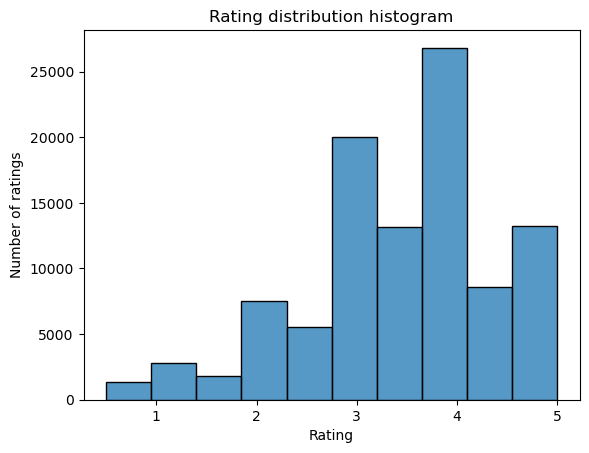

In [11]:
sns.histplot(data=movie_ratings, x='rating', bins=10, kde=False)

plt.title('Rating distribution histogram')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')



Average rating for movie

In [12]:
movie_ratings.groupby('title')['rating'].agg(['mean', 'count'])

,mean,count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


All entries for movies with more than 100 ratings

In [13]:
popular_movies = movie_ratings.groupby('title').filter(lambda x: x['rating'].count()>=100)

In [14]:
popular_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
91494,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,596,4.0,1535627191
91495,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,598,5.0,1430616930
91496,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,599,3.0,1498521715
91497,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,601,5.0,1441639524


Recommender system

In [15]:
user_movie_matrix = popular_movies.pivot_table(index='userId', columns='title', values='rating')
user_movie_matrix

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,5.0,NaN,NaN,4.0,3.5,4.5,4.5,4.0,1.0,4.5,...,4.5,4.0,NaN,NaN,4.5,NaN,4.0,NaN,NaN,NaN
607,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0
608,3.0,3.5,3.0,4.0,4.5,NaN,5.0,4.0,2.5,3.0,...,4.5,3.5,3.0,NaN,4.5,4.0,NaN,3.0,3.5,4.0


In [16]:
user_movie_matrix.fillna(0, inplace=True)

In [17]:
user_movie_matrix

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,0.0,4.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
5,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,5.0,0.0,0.0,4.0,3.5,4.5,4.5,4.0,1.0,4.5,...,4.5,4.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0
607,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
608,3.0,3.5,3.0,4.0,4.5,0.0,5.0,4.0,2.5,3.0,...,4.5,3.5,3.0,0.0,4.5,4.0,0.0,3.0,3.5,4.0


In [19]:
similarity = cosine_similarity(user_movie_matrix.T)

In [20]:
similarity

array([[1.        , 0.27180737, 0.26666997, ..., 0.20906034, 0.30100672,
        0.3909088 ],
       [0.27180737, 1.        , 0.58381423, ..., 0.52318801, 0.35451876,
        0.31678495],
       [0.26666997, 0.58381423, 1.        , ..., 0.50287173, 0.45553078,
        0.41724264],
       ...,
       [0.20906034, 0.52318801, 0.50287173, ..., 1.        , 0.27974492,
        0.27809627],
       [0.30100672, 0.35451876, 0.45553078, ..., 0.27974492, 1.        ,
        0.37527616],
       [0.3909088 , 0.31678495, 0.41724264, ..., 0.27809627, 0.37527616,
        1.        ]])

In [21]:
similarity = pd.DataFrame(similarity,index=user_movie_matrix.columns,columns=user_movie_matrix.columns)

In [22]:
similarity

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),1.000000,0.271807,0.266670,0.569947,0.563665,0.310194,0.450858,0.336402,0.346073,0.569111,...,0.443462,0.443564,0.207217,0.258914,0.394586,0.359695,0.293710,0.209060,0.301007,0.390909
Ace Ventura: Pet Detective (1994),0.271807,1.000000,0.583814,0.289795,0.260504,0.253664,0.295132,0.297858,0.329115,0.244806,...,0.358235,0.464536,0.379436,0.219916,0.361444,0.294823,0.263281,0.523188,0.354519,0.316785
Aladdin (1992),0.266670,0.583814,1.000000,0.349844,0.330907,0.196449,0.353335,0.298202,0.334279,0.258810,...,0.408679,0.429238,0.420645,0.294112,0.387548,0.300068,0.275932,0.502872,0.455531,0.417243
Alien (1979),0.569947,0.289795,0.349844,1.000000,0.773600,0.330537,0.524065,0.386448,0.367893,0.511868,...,0.426868,0.476632,0.294272,0.270866,0.434155,0.361806,0.325394,0.288316,0.384847,0.484586
Aliens (1986),0.563665,0.260504,0.330907,0.773600,1.000000,0.273812,0.480061,0.344400,0.346839,0.475215,...,0.374856,0.461290,0.270506,0.249825,0.420826,0.311754,0.293190,0.235292,0.375540,0.449982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V for Vendetta (2006),0.359695,0.294823,0.300068,0.361806,0.311754,0.467759,0.430286,0.465876,0.366785,0.291267,...,0.500045,0.325447,0.215818,0.498496,0.395414,1.000000,0.459253,0.265651,0.285416,0.429939
WALL·E (2008),0.293710,0.263281,0.275932,0.325394,0.293190,0.351143,0.301315,0.301151,0.270240,0.222462,...,0.341601,0.270302,0.153872,0.689383,0.295989,0.459253,1.000000,0.192832,0.245154,0.385504
Waterworld (1995),0.209060,0.523188,0.502872,0.288316,0.235292,0.167625,0.280213,0.225646,0.302384,0.232580,...,0.324637,0.400934,0.430701,0.172596,0.331865,0.265651,0.192832,1.000000,0.279745,0.278096


In [23]:
def recommend(mov):
    if mov in similarity.columns:
        rec = similarity[mov].sort_values(ascending=False).head(6).iloc[1:]
        print(rec)
    else:
        print("Movie not found or not enough ratings")

    

In [24]:
mov = input("Enter movie name: ")
recommend(mov)

Movie not found or not enough ratings


Input user id: recommend unwatched films

In [25]:
user = int(input("Enter user ID (1-610): "))
user_movie_matrix.iloc[3]
unwatched = (user_movie_matrix.loc[user].index[user_movie_matrix.loc[user] == 0.0]).tolist()

In [26]:
unwatched

['2001: A Space Odyssey (1968)',
 'Ace Ventura: Pet Detective (1994)',
 'Alien (1979)',
 'Aliens (1986)',
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",
 'American History X (1998)',
 'American Pie (1999)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Batman (1989)',
 'Batman Begins (2005)',
 'Batman Forever (1995)',
 'Beautiful Mind, A (2001)',
 'Blade Runner (1982)',
 'Bourne Identity, The (2002)',
 'Braveheart (1995)',
 'Cast Away (2000)',
 'Catch Me If You Can (2002)',
 'Clear and Present Danger (1994)',
 'Clerks (1994)',
 'Cliffhanger (1993)',
 'Clockwork Orange, A (1971)',
 'Clueless (1995)',
 'Crimson Tide (1995)',
 'Dances with Wolves (1990)',
 'Dark Knight, The (2008)',
 'Departed, The (2006)',
 'Die Hard (1988)',
 'Die Hard: With a Vengeance (1995)',
 'Donnie Darko (2001)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'E.T. the Extra-Terrestrial (1982)',
 'Eternal Sunshine of the Spotless Mind (2004)',
 "Ferris Buelle

In [27]:
# Function to get personalized recommendations for a user
def get_user_recommendations(user_id, n_recommendations=10):
    """
    Generate personalized movie recommendations for a user.
    
    Parameters:
    - user_id: The ID of the user
    - n_recommendations: Number of recommendations to return (default 10)
    
    Returns:
    - DataFrame with recommended movies and scores
    """
    
    # Get user's ratings
    user_ratings = user_movie_matrix.loc[user_id]
    
    # Separate watched (non-zero) and unwatched (zero) movies
    watched_movies = user_ratings[user_ratings > 0]
    
    # Filter to highly-rated movies (rating >= 4.0) as user's favorites
    liked_movies = watched_movies[watched_movies >= 4.0]
    
    print(f"User {user_id} has watched {len(watched_movies)} movies")
    print(f"User {user_id} liked {len(liked_movies)} movies (rating >= 4.0)")
    print(f"Generating recommendations from {len(unwatched)} unwatched movies...\n")
    
    # Calculate scores for unwatched movies
    scores = {}
    
    for movie in unwatched:
        if movie not in similarity.columns:
            continue
            
        score = 0
        total_sim = 0
        
        # Aggregate weighted similarity from liked movies
        for liked_movie, rating in liked_movies.items():
            if liked_movie in similarity.index:
                sim = similarity.loc[liked_movie, movie]
                
                if pd.notna(sim) and sim > 0:
                    # Weight by user's rating
                    score += sim * rating
                    total_sim += abs(sim)
        
        # Normalize by total similarity
        if total_sim > 0:
            scores[movie] = score / total_sim
    
    # Convert to DataFrame and sort
    recommendations = pd.DataFrame(list(scores.items()), 
                                  columns=['Movie', 'Predicted_Score'])
    recommendations = recommendations[recommendations['Predicted_Score'] > 0]
    recommendations = recommendations.sort_values('Predicted_Score', ascending=False)
    
    return recommendations.head(n_recommendations)


In [28]:
get_user_recommendations(user, n_recommendations=10)

User 4 has watched 36 movies
User 4 liked 21 movies (rating >= 4.0)
Generating recommendations from 102 unwatched movies...



,Movie,Predicted_Score
20,Clear and Present Danger (1994),4.511387
38,"Firm, The (1993)",4.506602
25,Crimson Tide (1995),4.498807
78,Schindler's List (1993),4.490507
87,Taxi Driver (1976),4.487756
79,"Shawshank Redemption, The (1994)",4.478539
97,"Usual Suspects, The (1995)",4.476957
84,Star Trek: Generations (1994),4.475364
17,Braveheart (1995),4.475203
26,Dances with Wolves (1990),4.473860


Movies with top ratings

In [29]:
highest_rated = popular_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
highest_rated = highest_rated.reset_index()
highest_rated.columns = ['title', 'rating']
highest_rated

,title,rating
0,"Shawshank Redemption, The (1994)",4.429022
1,"Godfather, The (1972)",4.289062
2,Fight Club (1999),4.272936
3,"Godfather: Part II, The (1974)",4.259690
4,"Departed, The (2006)",4.252336
5,Goodfellas (1990),4.250000
6,Casablanca (1942),4.240000
7,"Dark Knight, The (2008)",4.238255
8,"Usual Suspects, The (1995)",4.237745
9,"Princess Bride, The (1987)",4.232394


<Axes: xlabel='rating', ylabel='Density'>

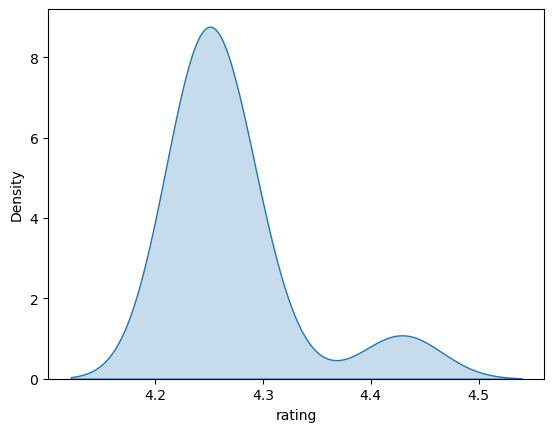

In [30]:
sns.kdeplot(data=highest_rated, x='rating', fill=True)